### Coding the matrix: lab number 9

[Book website](http://codingthematrix.com/)

#### Task 10.9.1: Unnormalized forward transform

In [1]:
v = [4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
len(v)

16

In [45]:
def forward_no_normalization(v: list) -> dict:
    D = {}
    while (len(v) > 1):
        # v is a k-element list
        k = len(v)
        # vnew is a k // 2 -element list
        vnew = [(v[2*i] + v[2*i + 1]) / 2 for i in range(0, k // 2)]
        # w is a list of coefficients of lenght k // 2
        w = [(v[2*i] - v[2*i + 1]) for i in range(0, k // 2)]  # unnormalized coefficients of basis for W(k/2)
        # dictionary with keys (k//2, 0), (k//2, 1), (k//2, k//2-1) and values from w
        D.update({(k//2, i) : w[i] for i in range(len(w))}) 
        v = vnew
    # v is a 1-element list
    D[(0,0)] = v[0] # store the last wavelet coefficient
    return D

In [46]:
import collections 
v_test=[4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
output = collections.OrderedDict(sorted(forward_no_normalization(v_test).items()))

In [47]:
expected = {(8,3): -1, (0,0): 3.5625, (8,2): -1, (8,1): -4, (4,1): 2.0, (4,3): 0.0,
   (8,0): -1, (2,1): 6.0, (2,0): 1.25, (8,7): 0, (4,2): 4.0, (8,6): 0,
   (1,0): 1.125, (4,0): -0.5, (8,5): -2, (8,4): 2}
expected = collections.OrderedDict(sorted(expected.items()))

In [48]:
expected

OrderedDict([((0, 0), 3.5625),
             ((1, 0), 1.125),
             ((2, 0), 1.25),
             ((2, 1), 6.0),
             ((4, 0), -0.5),
             ((4, 1), 2.0),
             ((4, 2), 4.0),
             ((4, 3), 0.0),
             ((8, 0), -1),
             ((8, 1), -4),
             ((8, 2), -1),
             ((8, 3), -1),
             ((8, 4), 2),
             ((8, 5), -2),
             ((8, 6), 0),
             ((8, 7), 0)])

In [49]:
output

OrderedDict([((0, 0), 3.5625),
             ((1, 0), 1.125),
             ((2, 0), 1.25),
             ((2, 1), 6.0),
             ((4, 0), -0.5),
             ((4, 1), 2.0),
             ((4, 2), 4.0),
             ((4, 3), 0.0),
             ((8, 0), -1),
             ((8, 1), -4),
             ((8, 2), -1),
             ((8, 3), -1),
             ((8, 4), 2),
             ((8, 5), -2),
             ((8, 6), 0),
             ((8, 7), 0)])

#### Task 10.9.2: Normalization in the forward transform

In [80]:
def normalize_coefficients(n: int, coeffs: dict) -> dict:
    keys = [x for x in coeffs.keys() if x != (0,0)]
    D = dict()
    for si in keys:
        norm = pow(n / (4 * si[0]), 0.5)
        D.update({si:coeffs[si] * norm})
    D.update({(0,0):coeffs[(0,0)] * pow(n, 0.5)})
    return D

In [81]:
d_test = {(2,0):1, (2,1):1, (1,0):1, (0,0):1}
d_expected = collections.OrderedDict(sorted({(2, 0): 0.707, (1, 0): 1.0, (0, 0): 2.0, (2, 1): 0.707}.items()))

In [82]:
d_result = collections.OrderedDict(sorted(normalize_coefficients(4, d_test).items()))

In [83]:
d_expected

OrderedDict([((0, 0), 2.0), ((1, 0), 1.0), ((2, 0), 0.707), ((2, 1), 0.707)])

In [84]:
d_result

OrderedDict([((0, 0), 2.0),
             ((1, 0), 1.0),
             ((2, 0), 0.7071067811865476),
             ((2, 1), 0.7071067811865476)])

In [86]:
v_test = [1,2,3,4]
d_test = forward_no_normalization(v_test)

In [87]:
normalize_coefficients(4, d_test)

{(2, 0): -0.7071067811865476,
 (2, 1): -0.7071067811865476,
 (1, 0): -2.0,
 (0, 0): 5.0}

#### Task 10.9.3 Forward transform to normalized Haar wavelet basis
<p>Combines the forward_no_transform and the normalize_coefficients</p>

In [91]:
v_test = [1,2,3,4]
d_expected = collections.OrderedDict(sorted({(2, 0): -(1/2)**0.5, (2,1): -(1/2)**0.5, (1, 0): -2, (0, 0): 5}.items()))

In [89]:
def forward(v: list) -> dict:
    n = len(v)
    return normalize_coefficients(n, forward_no_normalization(v))

In [95]:
collections.OrderedDict(sorted(forward(v_test).items()))

OrderedDict([((0, 0), 5.0),
             ((1, 0), -2.0),
             ((2, 0), -0.7071067811865476),
             ((2, 1), -0.7071067811865476)])

In [96]:
d_expected

OrderedDict([((0, 0), 5),
             ((1, 0), -2),
             ((2, 0), -0.7071067811865476),
             ((2, 1), -0.7071067811865476)])

#### Task 10.9.4 Suppresion of wavelet coefficients

In [114]:
def suppress(D: dict, threshold: float) -> dict:
    return {k:(v if abs(v) > threshold else 0.0) for (k, v) in D.items()}

In [117]:
suppress(forward([1,2,3,4]),1)

{(2, 0): 0.0, (2, 1): 0.0, (1, 0): -2.0, (0, 0): 5.0}

#### Task 10.9.5 Sparsity of compression

In [131]:
def sparsity(D: dict) -> float:
    num_non_zeros = sum([1 if abs(x) > 0.00001 else 0 for x in D.values()])
    return num_non_zeros / len(D)

In [132]:
D = forward([1,2,3,4])

In [133]:
sparsity(D)

1.0

In [134]:
sparsity(suppress(D,1))

0.5

#### Task 10.9.6 Unnormalization

In [135]:
def unnormalize_coefficients(n: int, D: dict) -> dict:
    keys = [k for k in D.keys() if k != (0,0)]
    coeffs = dict()
    for si in keys:
        norm = pow(n / (4 * si[0]), 0.5)
        coeffs.update({si:D[si] / norm})
    coeffs.update({(0,0): D[(0,0)] / pow(n, 0.5)})
    return coeffs

In [136]:
v_test = [1,2,3,4]
d_test = forward_no_normalization(v_test)
d_test

{(2, 0): -1, (2, 1): -1, (1, 0): -2.0, (0, 0): 2.5}

In [139]:
d_norm = normalize_coefficients(4, d_test)
d_norm

{(2, 0): -0.7071067811865476,
 (2, 1): -0.7071067811865476,
 (1, 0): -2.0,
 (0, 0): 5.0}

In [141]:
d_output = unnormalize_coefficients(4, d_norm)
d_output

{(2, 0): -1.0, (2, 1): -1.0, (1, 0): -2.0, (0, 0): 2.5}

#### Task 10.9.7 Backwards transform without normalization

In [147]:
def backward_no_normalization(D: dict) -> list:
    n = len(D)
    v = [D[(0,0)]]
    while len(v) < n:
        b_ix = len(v)
        vnew = list()
        for w_ix, w in enumerate(v):
            w_val = D[(b_ix, w_ix)]
            vnew.append(w + (w_val / 2))
            vnew.append(w - (w_val / 2))
        v = vnew
    return v

In [148]:
v_test = [1,2,3,4]
d_test = forward_no_normalization(v_test)

In [149]:
d_test

{(2, 0): -1, (2, 1): -1, (1, 0): -2.0, (0, 0): 2.5}

In [150]:
backward_no_normalization(d_test)

[1.0, 2.0, 3.0, 4.0]

In [182]:
v_test=[4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
d_test = forward_no_normalization(v_test)

In [153]:
d_test

{(8, 0): -1,
 (8, 1): -4,
 (8, 2): -1,
 (8, 3): -1,
 (8, 4): 2,
 (8, 5): -2,
 (8, 6): 0,
 (8, 7): 0,
 (4, 0): -0.5,
 (4, 1): 2.0,
 (4, 2): 4.0,
 (4, 3): 0.0,
 (2, 0): 1.25,
 (2, 1): 6.0,
 (1, 0): 1.125,
 (0, 0): 3.5625}

In [154]:
backward_no_normalization(d_test)

[4.0,
 5.0,
 3.0,
 7.0,
 4.0,
 5.0,
 2.0,
 3.0,
 9.0,
 7.0,
 3.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0]

#### Task 10.9.6 Backwards transform taking normalization into account

In [159]:
def backwards(D: dict) -> list:
    n = len(D)
    return backward_no_normalization(unnormalize_coefficients(n, D))

In [160]:
v_test = [1,2,3,4]
d_test = forward(v_test)

In [161]:
d_test

{(2, 0): -0.7071067811865476,
 (2, 1): -0.7071067811865476,
 (1, 0): -2.0,
 (0, 0): 5.0}

In [162]:
backwards(d_test)

[1.0, 2.0, 3.0, 4.0]

### Test with real data

In [164]:
import os
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src/exploratory_notebooks'

In [165]:
os.chdir('../')

In [166]:
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src'

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
signal = pd.read_excel('data/eurusd.xlsx')

In [170]:
signal.head()

,Date,PX_LAST
0,2020-04-03,1.0801
1,2020-04-02,1.0858
2,2020-04-01,1.0964
3,2020-03-31,1.1031
4,2020-03-30,1.1048


In [171]:
from production_code import constants

In [172]:
signal = signal.loc[signal["Date"] <= constants.NON_POW_END_DATE]
signal = signal.loc[signal["Date"] >= constants.NON_POW_START_DATE]
signal = signal["PX_LAST"].to_numpy()

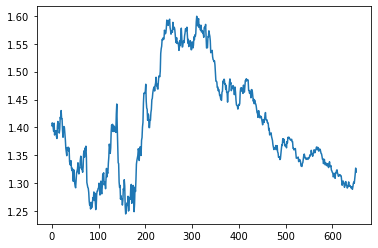

In [173]:
plt.plot(signal)

In [223]:
# Get power of 2 observations
import math

k = len(signal)
while not (math.log2(k).is_integer()):
    k -= 1

print(k)

512


In [224]:
# we choose right side of vector (for forecasting)
signal = signal[len(signal) - k:]

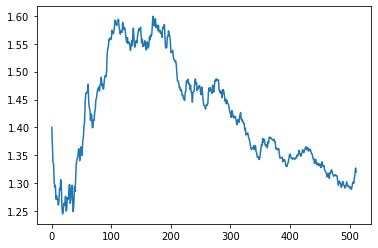

In [226]:
plt.plot(signal)

In [227]:
wavelet_coeffs = forward(signal)

In [235]:
wavelet_coeffs = suppress(wavelet_coeffs, 0.05)

In [236]:
reconstruct_signal = backwards(wavelet_coeffs)

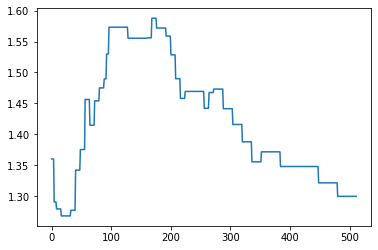

In [237]:
plt.plot(reconstruct_signal)

In [231]:
wavelet_coeffs

{(256, 0): 0.022203152929257505,
 (256, 1): 0.0012020815280171554,
 (256, 2): 0.006788225099390894,
 (256, 3): 0.01732411613907039,
 (256, 4): 0.004242640687119289,
 (256, 5): 0.0072831998462214225,
 (256, 6): -0.015061374439273531,
 (256, 7): -0.013081475451951102,
 (256, 8): 0.025880108191427775,
 (256, 9): -0.002545584412271448,
 (256, 10): -0.002262741699797017,
 (256, 11): -0.011596551211459359,
 (256, 12): -0.0012020815280171554,
 (256, 13): 0.002121320343559566,
 (256, 14): -0.016899852070358354,
 (256, 15): 0.023900209204105346,
 (256, 16): -0.013364318164425848,
 (256, 17): 0.01979898987322335,
 (256, 18): -0.009192388155425049,
 (256, 19): 0.005586143571373895,
 (256, 20): -0.019869700551341997,
 (256, 21): -0.0032526911934582315,
 (256, 22): -0.008485281374238578,
 (256, 23): 0.012162236636408535,
 (256, 24): -0.0035355339059326626,
 (256, 25): 0.006293250352560366,
 (256, 26): -0.0033234018715767215,
 (256, 27): -0.0058689862838483264,
 (256, 28): -0.012657211383239221,
 (2